In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [39]:
df_housing_train = pd.read_csv("../ynov-data/train_housing_train.csv")
df_housing_valid = pd.read_csv("../ynov-data/train_housing_valid.csv")

In [40]:
median_house_value = df_housing_train['median_house_value'].values.reshape(-1, 1)
median_income = df_housing_train['median_income'].values.reshape(-1, 1)

In [41]:
model = LinearRegression()
model.fit(median_income, median_house_value)

LinearRegression()

In [42]:
print(f"Coefficient (pente): {float(model.coef_[0]):.3f}")
print(f"Intercept: {float(model.intercept_):.2f}")

Coefficient (pente): 41773.527
Intercept: 45284.18


/tmp/ipykernel_305114/2337994802.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Coefficient (pente): {float(model.coef_[0]):.3f}")
/tmp/ipykernel_305114/2337994802.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Intercept: {float(model.intercept_):.2f}")


Coefficient de régression (pente) : [41773.52678379]
Intercept : [45284.1806267]
Erreur quadratique moyenne (MSE) : 7010101855.754492
RMSE : 83726.35102376367
Score R² : 0.4761284284209881


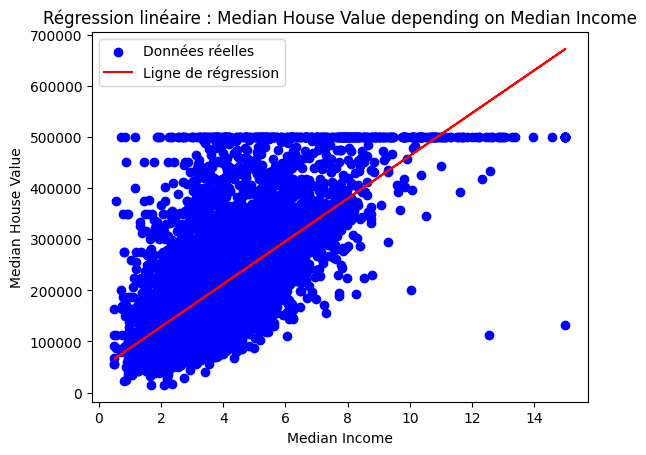

In [49]:
# Prédiction des valeurs de taille à partir du poids
median_house_pred = model.predict(median_income)

# Affichage des résultats
print("Coefficient de régression (pente) :", model.coef_[0])
print("Intercept :", model.intercept_)
print("Erreur quadratique moyenne (MSE) :", mean_squared_error(median_house_value, median_house_pred))
print("RMSE :", root_mean_squared_error(median_house_value, median_house_pred))
print("Score R² :", r2_score(median_house_value, median_house_pred))

# Visualisation des données et de la droite de régression
plt.scatter(median_income, median_house_value, color="blue", label="Données réelles")
plt.plot(median_income, median_house_pred, color="red", label="Ligne de régression")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Régression linéaire : Median House Value depending on Median Income")
plt.legend()
plt.show()

Coefficient de régression (pente) : [41773.52678379]
Intercept : [45284.1806267]
Erreur quadratique moyenne (MSE) : 6953146104.842492
RMSE : 83385.52695067947
Score R² : 0.48194630433455554


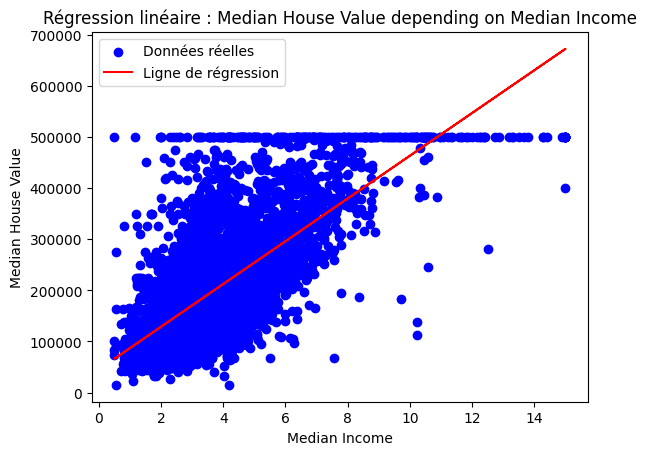

In [58]:
median_income= df_housing_valid['median_income'].values.reshape(-1, 1)
median_house_value = df_housing_valid['median_house_value'].values.reshape(-1, 1)

median_house_pred = model.predict(median_income)

# Affichage des résultats
print("Coefficient de régression (pente) :", model.coef_[0])
print("Intercept :", model.intercept_)
print("Erreur quadratique moyenne (MSE) :", mean_squared_error(median_house_value, median_house_pred))
print("RMSE :", root_mean_squared_error(median_house_value, median_house_pred))
print("Score R² :", r2_score(median_house_value, median_house_pred))

# Visualisation des données et de la droite de régression
plt.scatter(median_income, median_house_value, color="blue", label="Données réelles")
plt.plot(median_income, median_house_pred, color="red", label="Ligne de régression")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Régression linéaire : Median House Value depending on Median Income")
plt.legend()
plt.show()

In [68]:
#Predictions on test
df_housing_test = pd.read_csv('../ynov-data/test_housing.csv')

median_income_test = df_housing_test['median_income'].values.reshape(-1, 1)

predictions = model.predict(median_income_test)

predictions

array([[281016.36962028],
       [179088.96426784],
       [181904.49997307],
       ...,
       [116299.17615914],
       [123283.70983738],
       [145064.42670245]])

In [69]:
df_submission = pd.read_csv("../ynov-data/submission.csv")
df_submission['median_house_value'] = predictions
df_submission.to_csv('../ynov-data/submission.csv', index=False)